$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Assignment 2: Neural Network Regression

*Type your name here and rewrite all of the following sections.  Add more sections to present your code, results, and discussions.*

## Overview

Starting with the ```NeuralNetwork``` class from the lecture notes, you will create two new versions of that class, apply them to a data set, and discuss the results.

## Required Code

Start with the ```NeuralNetwork``` class defined in lecture notes 09. Put that class definition as written into *neuralnetworks.py* into your current directory.  Also place *mlutilities.py* from lecture notes 09 in your current directory. If this is done correctly, then the following code should run and produce results similar to what is shown here.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import neuralnetworks as nn

X = np.arange(10).reshape((-1,1))
T = np.sin(X)

nnet = nn.NeuralNetwork(1, [10], 1)
nnet.train(X, T, 100, verbose=True)
nnet

SCG: Iteration 10 fValue Eval 0.239364846531 Scale 0.032768
SCG: Iteration 20 fValue Eval 0.0688970109711 Scale 3.2e-05
SCG: Iteration 30 fValue Eval 0.043928582723 Scale 0.002048
SCG: Iteration 40 fValue Eval 0.00998064809604 Scale 2e-06
SCG: Iteration 50 fValue Eval 0.0054896886437 Scale 1.953125e-09
SCG: Iteration 60 fValue Eval 0.00318618264632 Scale 1.9073486328125e-12
SCG: Iteration 70 fValue Eval 0.00250735339565 Scale 1.862645149230957e-15
SCG: Iteration 80 fValue Eval 0.00177889407442 Scale 1e-15
SCG: Iteration 90 fValue Eval 0.00111215111247 Scale 1e-15
SCG: Iteration 100 fValue Eval 0.000785820652277 Scale 1e-15


NeuralNetwork(1, [10], 1)
   Network was trained for 101 iterations that took 0.0959 seconds. Final error is 0.028032492794551653.

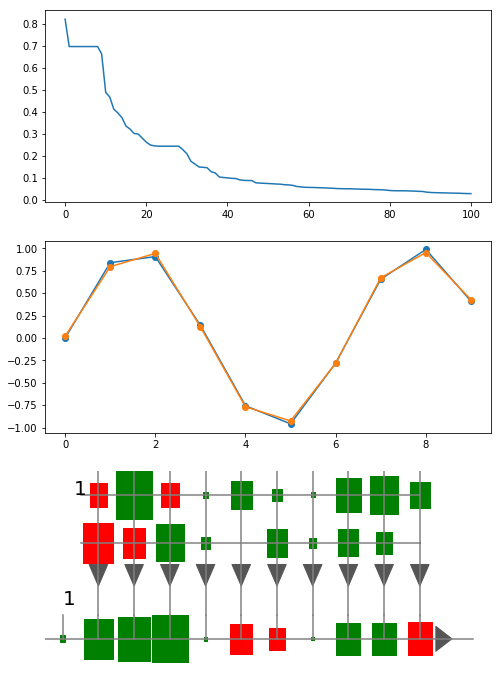

In [3]:
plt.figure(figsize=(8, 12))
plt.subplot(3, 1, 1)
plt.plot(nnet.getErrors())

plt.subplot(3, 1, 2)
plt.plot(X, T, 'o-', label='Actual')
plt.plot(X, nnet.use(X), 'o-', label='Predicted')

plt.subplot(3, 1, 3)
nnet.draw()

Now let's extract the parts of the neural network code that refer to the activation function and its derivative into two new methods.  Copy your file *neuralnetworks.py* into a new file named *neuralnetworks2.py*.  Modify the code in *neuralnetworksA2.py* by adding these two methods to the ```NeuralNetwork``` class:

    def activation(self, weighted_sum):
        return np.tanh(weighted_sum)
        
    def activationDerivative(self, activation_value):
        return 1 - activation_value * activation_value
        
Now replace the code in the appropriate places in the ```NeuralNetwork``` class so that ```np.tanh``` is replaced with a call to the ```self.activation``` method and its derivative is replaced by calls to ```self.activationDerivative```.

In [4]:
import neuralnetworksA2 as nn2

nnet = nn2.NeuralNetwork(1, [10], 1)

In [5]:
[nnet.activation(s) for s in [-2, -0.5, 0, 0.5, 2]]

[-0.9640275800758169,
 -0.46211715726000974,
 0.0,
 0.46211715726000974,
 0.9640275800758169]

In [6]:
[nnet.activationDerivative(nnet.activation(s)) for s in [-2, -0.5, 0, 0.5, 2]]

[0.070650824853164429,
 0.7864477329659274,
 1.0,
 0.7864477329659274,
 0.070650824853164429]

In [7]:
nnet.train(X, T, 100, verbose=True)
nnet

SCG: Iteration 10 fValue Eval 0.438588561479 Scale 0.004096
SCG: Iteration 20 fValue Eval 0.123549092345 Scale 0.000512
SCG: Iteration 30 fValue Eval 0.0408251489273 Scale 5e-07
SCG: Iteration 40 fValue Eval 0.0185617914614 Scale 4.8828125e-10
SCG: Iteration 50 fValue Eval 0.0117486680898 Scale 9.5367431640625e-13
SCG: Iteration 60 fValue Eval 0.0087353566742 Scale 1e-15
SCG: Iteration 70 fValue Eval 0.00772263471694 Scale 1e-15
SCG: Iteration 80 fValue Eval 0.0059752743969 Scale 1e-15
SCG: Iteration 90 fValue Eval 0.00313802466694 Scale 1e-15
SCG: Iteration 100 fValue Eval 0.00130984535891 Scale 1e-15


NeuralNetwork(1, [10], 1)
   Network was trained for 101 iterations that took 0.0963 seconds. Final error is 0.03619178579337279.

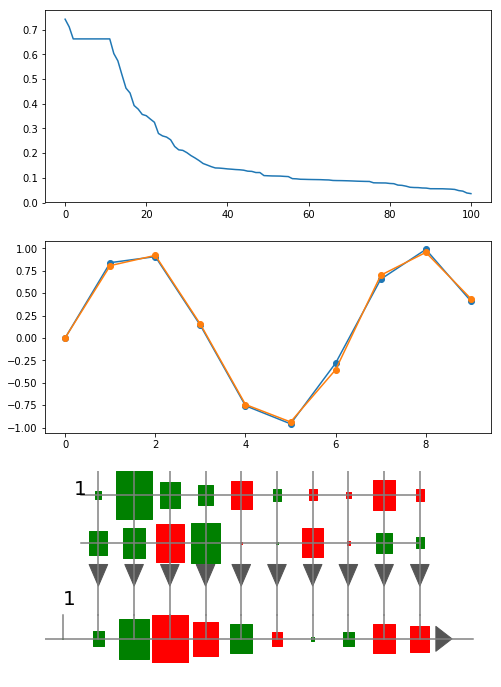

In [8]:
plt.figure(figsize=(8, 12))
plt.subplot(3, 1, 1)
plt.plot(nnet.getErrors())

plt.subplot(3, 1, 2)
plt.plot(X, T, 'o-', label='Actual')
plt.plot(X, nnet.use(X), 'o-', label='Predicted')

plt.subplot(3, 1, 3)
nnet.draw()

Now use the ```trainValidateTestKFolds``` function from lecture notes 05 to find best neural network architecture for a data set.  This function is available in *mlutilities.py* from lecture notes 09.

In [9]:
import mlutilities as ml

In [10]:
ml.trainValidateTestKFolds

<function mlutilities.trainValidateTestKFolds>

To use this function, you must define two functions to train and evaluate a network using particular parameters.  We did this in lecture notes 05 for ridge regression.  Your new versions of these two functions must be defined as follows.

   * ```train(X, T, hidden, nIterations)```:  hidden is list of ints giving number of units in each hidden layer. Returns the trained neural network
    
   * ```evaluate(nnet, X, T)```:  returns the RMSE of the trained nnet when applied to X and compared to T

For example, here is the result of trying various network structures.  Here we test a network with no hidden layers, one hidden layer with 5 units, and two hidden layers with 10 units in first layer and 5 in second.  We also try 10 and 100 as number of iterations.

In [12]:
parameters = [(h, n) for h in [0, [5], [10, 5]] for n in [10, 100]]
parameters

[(0, 10), (0, 100), ([5], 10), ([5], 100), ([10, 5], 10), ([10, 5], 100)]

In [ ]:
results = ml.trainValidateTestKFolds(train, evaluate, X, T, parameters, nFolds=5)